In [1]:
import pandas as pd
import os
import requests
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
#https://docs.google.com/document/d/1voRFKYVcaNlyWLFosLvdVbpw39z5i6QFZemXZJct3yE/edit

In [3]:
%matplotlib inline

In [4]:
cwd = os.getcwd()
cwd

'C:\\Users\\darre\\springboard-test\\Capstone 1'

In [5]:
os.chdir('..')
os.getcwd()
os.chdir('C:\\Users\\darre\\Desktop')
os.getcwd()
os.listdir('.')

['BCHI Data.csv',
 'desktop.ini',
 'LinkedIn Summary V2.txt',
 'Search Strategy and Data Extraction.txt',
 'Shift.lnk',
 'springboard-test',
 'springboard-test_OG',
 'SubSaharan1.xlsx',
 'SubSaharan2.xlsx']

In [6]:
#Importing export of Department of Health Services (DHS) surveys and chosen statistics for Sub-Saharan Africa from 1980 to present
file = 'SubSaharan2.xlsx'
x1=pd.ExcelFile(file)
print(x1.sheet_names)
surveys=x1.parse('Indicator Data')
surveys.head(10)

['Indicator Data']


,Country Code,Country Name,Survey Year,Survey Name,Indicator,By Variable,Characteristic Category,Characteristic Label,Value,CI High,CI Low,CI High.1,CI Low.1
0,AO,Angola,2011.0,2011 MIS,Unmet need for family planning,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
1,AO,Angola,2011.0,2011 MIS,Infant mortality rate,NaN,Total,Total,50.0,NaN,NaN,NaN,NaN
2,AO,Angola,2011.0,2011 MIS,Under-five mortality rate,NaN,Total,Total,91.0,NaN,NaN,NaN,NaN
3,AO,Angola,2011.0,2011 MIS,Received all 8 basic vaccinations,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
4,AO,Angola,2011.0,2011 MIS,Children stunted,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
5,AO,Angola,2011.0,2011 MIS,HIV prevalence among women,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
6,AO,Angola,2011.0,2011 MIS,HIV prevalence among men,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
7,AO,Angola,2011.0,2011 MIS,HIV prevalence among general population,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
8,AO,Angola,2015.0,2015-16 DHS,Unmet need for family planning,NaN,Total,Total,38.0,NaN,NaN,NaN,NaN
9,AO,Angola,2015.0,2015-16 DHS,Infant mortality rate,NaN,Total,Total,44.0,NaN,NaN,NaN,NaN


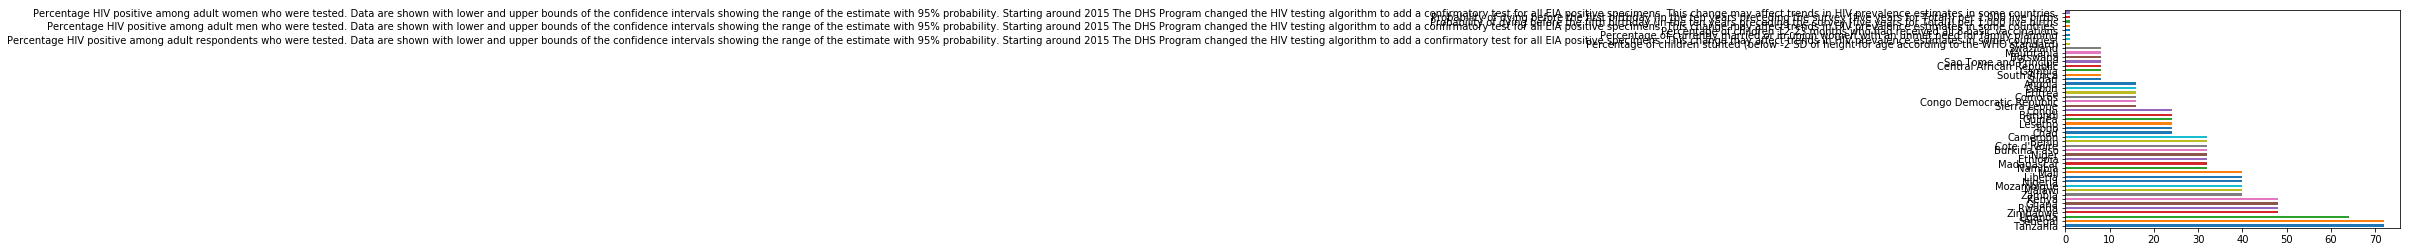

In [7]:
surveys['Country Name'].value_counts().plot.barh()
#Country name is not accurate in export

0                                                      AO
1                                                      AO
2                                                      AO
3                                                      AO
4                                                      AO
5                                                      AO
6                                                      AO
7                                                      AO
8                                                      AO
9                                                      AO
10                                                     AO
11                                                     AO
12                                                     AO
13                                                     AO
14                                                     AO
15                                                     AO
16                                                     BJ
17            

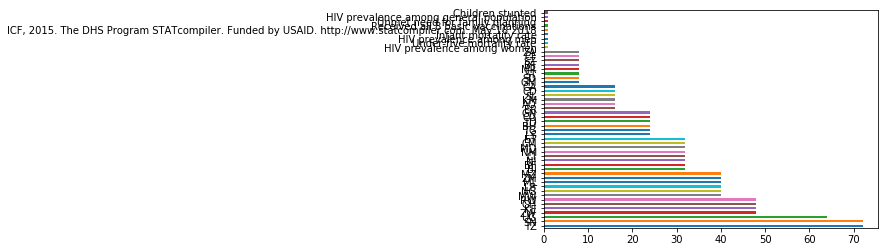

In [8]:
#Finding where the issue is with country name
surveys['Country Code'].value_counts().plot.barh()
surveys['Country Code'].values
surveys['Country Code']
#seems last rows explain what the metrics exported are

In [9]:
surveys.tail(10)
#The last ten rows are there to explain what the columns mean. we will remove them from the dataset

,Country Code,Country Name,Survey Year,Survey Name,Indicator,By Variable,Characteristic Category,Characteristic Label,Value,CI High,CI Low,CI High.1,CI Low.1
1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1201,Unmet need for family planning,Percentage of currently married or in union wo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202,Infant mortality rate,Probability of dying before the first birthday...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1203,Under-five mortality rate,Probability of dying before the fifth birthday...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1204,Received all 8 basic vaccinations,Percentage of children 12-23 months who had re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1205,Children stunted,Percentage of children stunted (below -2 SD of...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1206,HIV prevalence among general population,Percentage HIV positive among adult respondent...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1207,HIV prevalence among women,Percentage HIV positive among adult women who ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1208,HIV prevalence among men,Percentage HIV positive among adult men who we...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1209,"ICF, 2015. The DHS Program STATcompiler. Funde...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
surveys=surveys.head(1199)

In [11]:
#Creating dictionary with countries and regions
regions={}
regions.update(dict.fromkeys(['Algeria', 'Egypt','Libya','Morocco','South Sudan','Sudan','Tunisia'],'North Africa'))
regions.update(dict.fromkeys([
    'Benin',
    'Burkina Faso',
    'Cape Verde',
    'Cote d\'Ivoire',
    'Gambia',
    'Ghana',
    'Guinea',
    'Liberia',
    'Mali',
    'Mauritania',
    'Niger',
    'Nigeria',
    'Saint Helena',
    'Senegal',
    'Sierra Leone',
    'Togo'],'West Africa'))
regions.update(dict.fromkeys([
    'Burundi',
    'Comoros',
    'Djibouti',
    'Eritrea',
    'Ethiopia',
    'Kenya',
    'Madagascar',
    'Malawi',
    'Mauritius',
    'Mayotte',
    'Mozambique',
    'Reunion',
    'Rwanda',
    'Seychelles',
    'Somalia',
    'Tanzania',
    'Uganda',
    'Zambia',
    'Zimbabwe'
],'East Africa'))
regions.update(dict.fromkeys([
    'Angola',
    'Cameroon',
    'Central African Republic',
    'Chad',
    'Congo',
    'Congo Democratic Republic',
    'Equatorial Guinea',
    'Gabon',
    'Sao Tome and Principe'
],'Central Africa'))
regions.update(dict.fromkeys([
    'Botswana',
    'Lesotho',
    'Namibia',
    'South Africa',
    'Swaziland'
],'South Africa'))


In [14]:
surveys['Region']=surveys['Country Name'].apply(lambda row: regions.get(row))
surveys.head()
#rearrange the columns
surveys = surveys[['Country Code', 'Survey Year','Country Name', 'Region','Survey Name','Indicator','By Variable','Characteristic Category','Characteristic Label','Value','CI High','CI Low','CI High.1','CI Low.1']]
surveys.head(100)

,Country Code,Survey Year,Country Name,Region,Survey Name,Indicator,By Variable,Characteristic Category,Characteristic Label,Value,CI High,CI Low,CI High.1,CI Low.1
0,AO,2011.0,Angola,Central Africa,2011 MIS,Unmet need for family planning,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
1,AO,2011.0,Angola,Central Africa,2011 MIS,Infant mortality rate,NaN,Total,Total,50.0,NaN,NaN,NaN,NaN
2,AO,2011.0,Angola,Central Africa,2011 MIS,Under-five mortality rate,NaN,Total,Total,91.0,NaN,NaN,NaN,NaN
3,AO,2011.0,Angola,Central Africa,2011 MIS,Received all 8 basic vaccinations,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
4,AO,2011.0,Angola,Central Africa,2011 MIS,Children stunted,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
5,AO,2011.0,Angola,Central Africa,2011 MIS,HIV prevalence among women,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
6,AO,2011.0,Angola,Central Africa,2011 MIS,HIV prevalence among men,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
7,AO,2011.0,Angola,Central Africa,2011 MIS,HIV prevalence among general population,NaN,Total,Total,NaN,NaN,NaN,NaN,NaN
8,AO,2015.0,Angola,Central Africa,2015-16 DHS,Unmet need for family planning,NaN,Total,Total,38.0,NaN,NaN,NaN,NaN
9,AO,2015.0,Angola,Central Africa,2015-16 DHS,Infant mortality rate,NaN,Total,Total,44.0,NaN,NaN,NaN,NaN


In [12]:
#Running data quality report
df=surveys.copy()
columns = list(df.columns.values)
data_types = pd.DataFrame(df.dtypes,columns=['dtype'])
missing_data_counts = pd.DataFrame(df.isnull().sum(),columns=['missing'])
present_data_counts = pd.DataFrame(df.count(),columns=['count'])
unique_value_counts = pd.DataFrame(columns=['unique'])
#for v in list(df.columns.values):
#    unique_value_counts.loc[v] = [df[v].nunique()]
#minimum_values = pd.DataFrame(columns=['min'])
#for v in list(df.columns.values):
#    minimum_values.loc[v] = [df[v].min()]
#maximum_values = pd.DataFrame(columns=['max'])
#for v in list(df.columns.values):
#    maximum_values.loc[v] = [df[v].max()]
data_quality_report = (data_types.join(present_data_counts).join(missing_data_counts).
                       join(unique_value_counts))#.join(minimum_values).
                       #join(maximum_values)

print("\nData Quality Report")
print("Total records: {}".format(len(df.index)))
data_quality_report.sort_values(['missing'], ascending=False)


Data Quality Report
Total records: 1199


,dtype,count,missing,unique
By Variable,float64,0,1199,NaN
CI High.1,float64,0,1199,NaN
CI Low.1,float64,0,1199,NaN
CI High,float64,182,1017,NaN
CI Low,float64,182,1017,NaN
Value,float64,736,463,NaN
Country Code,object,1199,0,NaN
Country Name,object,1199,0,NaN
Survey Year,float64,1199,0,NaN
Survey Name,object,1199,0,NaN


In [40]:
#Tells us about 60% of metrics are included, while only 15% of all metrics have an included confidence interval. 
#We can also drop the 3 empty columns (CI High.1, CI Low.1, By Variable)
surveys = surveys[['Country Code', 'Survey Year','Country Name', 'Region','Survey Name','Indicator','Characteristic Category','Characteristic Label','Value','CI High','CI Low']]
surveys.head(10)

,Country Code,Survey Year,Country Name,Region,Survey Name,Indicator,Characteristic Category,Characteristic Label,Value,CI High,CI Low
0,AO,2011.0,Angola,Central Africa,2011 MIS,Unmet need for family planning,Total,Total,NaN,NaN,NaN
1,AO,2011.0,Angola,Central Africa,2011 MIS,Infant mortality rate,Total,Total,50.0,NaN,NaN
2,AO,2011.0,Angola,Central Africa,2011 MIS,Under-five mortality rate,Total,Total,91.0,NaN,NaN
3,AO,2011.0,Angola,Central Africa,2011 MIS,Received all 8 basic vaccinations,Total,Total,NaN,NaN,NaN
4,AO,2011.0,Angola,Central Africa,2011 MIS,Children stunted,Total,Total,NaN,NaN,NaN
5,AO,2011.0,Angola,Central Africa,2011 MIS,HIV prevalence among women,Total,Total,NaN,NaN,NaN
6,AO,2011.0,Angola,Central Africa,2011 MIS,HIV prevalence among men,Total,Total,NaN,NaN,NaN
7,AO,2011.0,Angola,Central Africa,2011 MIS,HIV prevalence among general population,Total,Total,NaN,NaN,NaN
8,AO,2015.0,Angola,Central Africa,2015-16 DHS,Unmet need for family planning,Total,Total,38.0,NaN,NaN
9,AO,2015.0,Angola,Central Africa,2015-16 DHS,Infant mortality rate,Total,Total,44.0,NaN,NaN


Text(0.5,1,'Metrics captured Per Country from 1970-2015')

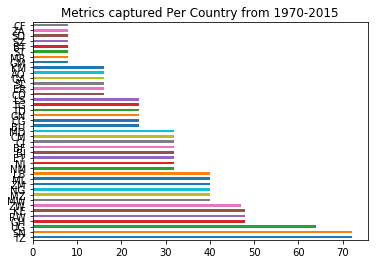

In [41]:
#Plotting survey count by country
surveys['Country Code'].value_counts().plot.barh().set_title('Metrics captured Per Country from 1970-2015')
#too many surveys -- this is counting each metric in each survey

Text(0.5,1,'Surveys Per Country from 1970-2015')

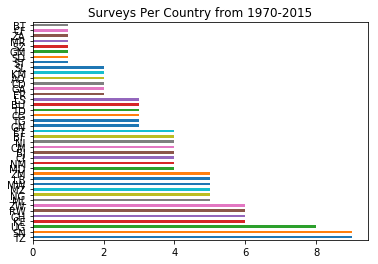

In [42]:
#need to look at just one metric, because each row is one data point in one survey, and we want to get survey count
surveys_infant=surveys.loc[surveys['Indicator']=='Infant mortality rate']
surveys_infant['Country Code'].value_counts().plot.barh().set_title('Surveys Per Country from 1970-2015')
#Most a country has is 9 surveys (Tanzania, Senegal). Some countries only have one survey done.

,Region
Country,
East Africa,19
West Africa,16
Central Africa,9
North Africa,7
South Africa,5


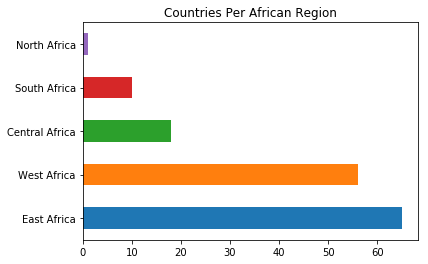

In [43]:
#plotting survey count by region
surveys_infant['Region'].value_counts().plot.barh().set_title('Countries Per African Region')
#Looking at a per-country basis
#do count of countries for each key in regions dict
region_df=pd.DataFrame(list(regions.items()),columns=['Region','Country'])
region_df.head()
pd.pivot_table(region_df,values='Region',index=['Country'],aggfunc='count').sort_values('Region',ascending=False)

                Country Code  Country Count
Region                                     
East Africa               65             19
West Africa               56             16
Central Africa            18              9
South Africa              10             10
North Africa               1              1


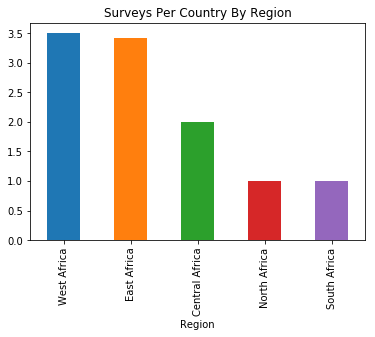

In [44]:
surveys_per_country=pd.pivot_table(surveys_infant,values='Country Code',index=['Region'],aggfunc='count').sort_values('Country Code',ascending=False)
surveys_per_country['Country Count']=[19,16,9,10,1]
print(surveys_per_country)
surveys_per_country=surveys_per_country['Country Code']/surveys_per_country['Country Count']
surveys_per_country.head()
surveys_per_country.sort_values(ascending=False).plot(kind='bar',title='Surveys Per Country By Region')
#place these onto a map. maybe not in Python but in a write up and color code 

In [45]:
#Add chart showing which metrics are the most filled out, i.e. fewest NaN's

In [46]:
'''infant
df=infant.reset_index()
df.columns
#df.drop(['Country Name'], axis = 1, inplace = True)
df = df.melt('Survey Year', var_name='cols',  value_name='vals')
df.fillna(0,inplace=True)
g = sns.factorplot(x="Survey Year", y="vals", hue='cols', data=df)'''

'infant\ndf=infant.reset_index()\ndf.columns\n#df.drop([\'Country Name\'], axis = 1, inplace = True)\ndf = df.melt(\'Survey Year\', var_name=\'cols\',  value_name=\'vals\')\ndf.fillna(0,inplace=True)\ng = sns.factorplot(x="Survey Year", y="vals", hue=\'cols\', data=df)'

In [47]:
'''a=np.array((infant.iloc[:,0]))
m=np.isfinite(a)
a[m]
l=np.arange(len(a))
l[m]
plt.plot(l[m],a[m])'''

'a=np.array((infant.iloc[:,0]))\nm=np.isfinite(a)\na[m]\nl=np.arange(len(a))\nl[m]\nplt.plot(l[m],a[m])'

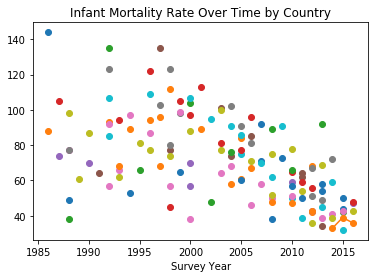

In [16]:
#Plotting average for each country for one metric (Infant mortality)
surveys_infant=surveys.loc[surveys['Indicator']=='Infant mortality rate']
infant=pd.pivot_table(surveys_infant,values='Value',index='Survey Year',columns='Country Name')
infant.head()
infant.plot.line(legend=None, marker='o',title='Infant Mortality Rate Over Time by Country')
plt.show()
#can make this a line graph by masking the NaN https://stackoverflow.com/questions/14399689/matplotlib-drawing-lines-between-points-ignoring-missing-data?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
#make this plot for all metrics

In [17]:
infant.head()
#get this in 4 columns, sns

Country Name,Angola,Benin,Botswana,Burkina Faso,Burundi,Cameroon,Central African Republic,Chad,Comoros,Congo,...,Senegal,Sierra Leone,South Africa,Sudan,Swaziland,Tanzania,Togo,Uganda,Zambia,Zimbabwe
Survey Year,,,,,,,,,,,,,,,,,,,,,
1986.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987.0,NaN,NaN,NaN,NaN,74.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988.0,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,77.0,98.0,NaN,49.0
1989.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
sns.pointplot(x='Survey Year',y='Country Name',data=infant)

NameError: name 'infant' is not defined

Infant mortality rate
Unmet need for family planning
Under-five mortality rate
Received all 8 basic vaccinations
Children stunted
HIV prevalence among men


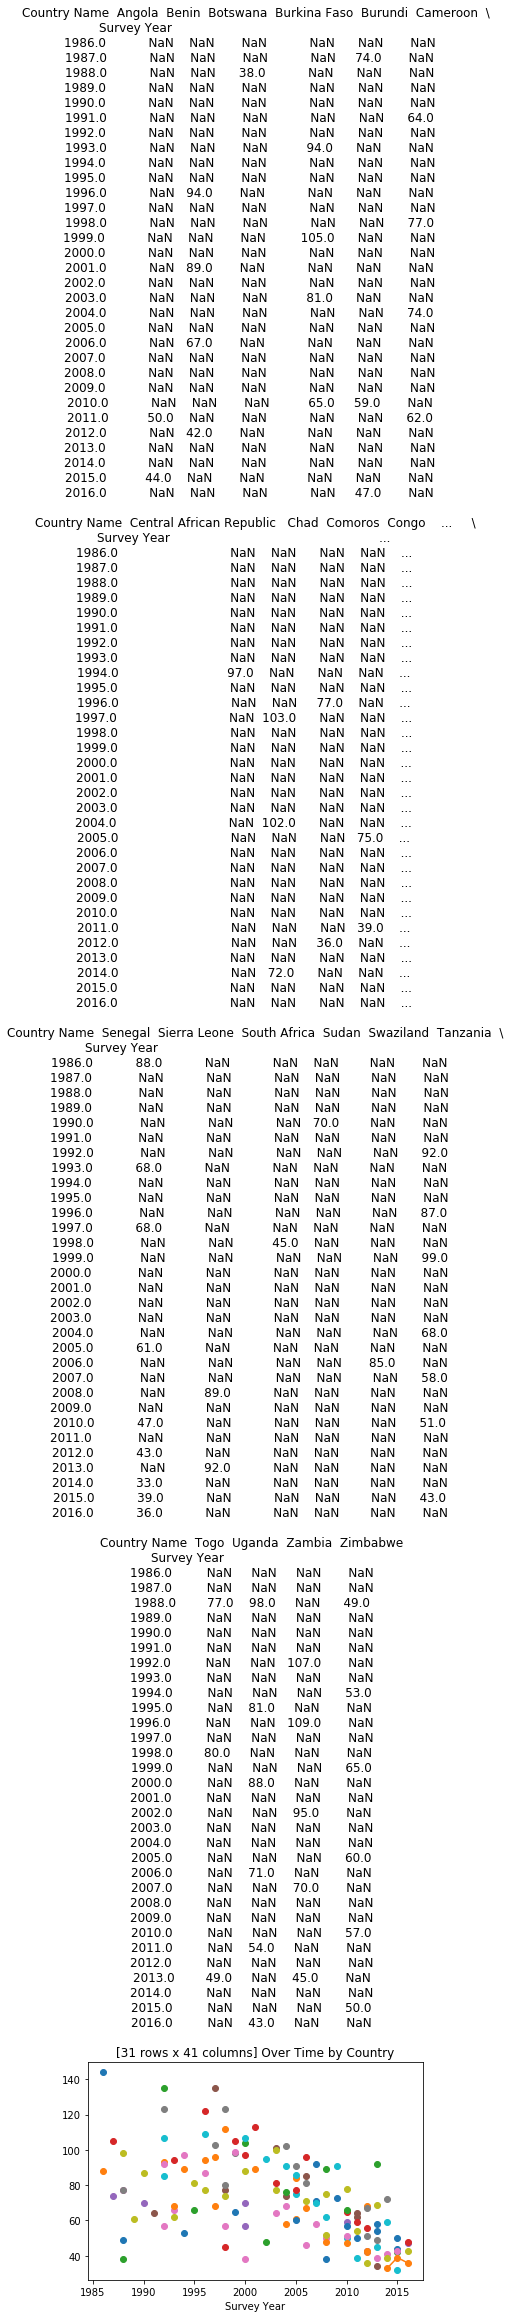

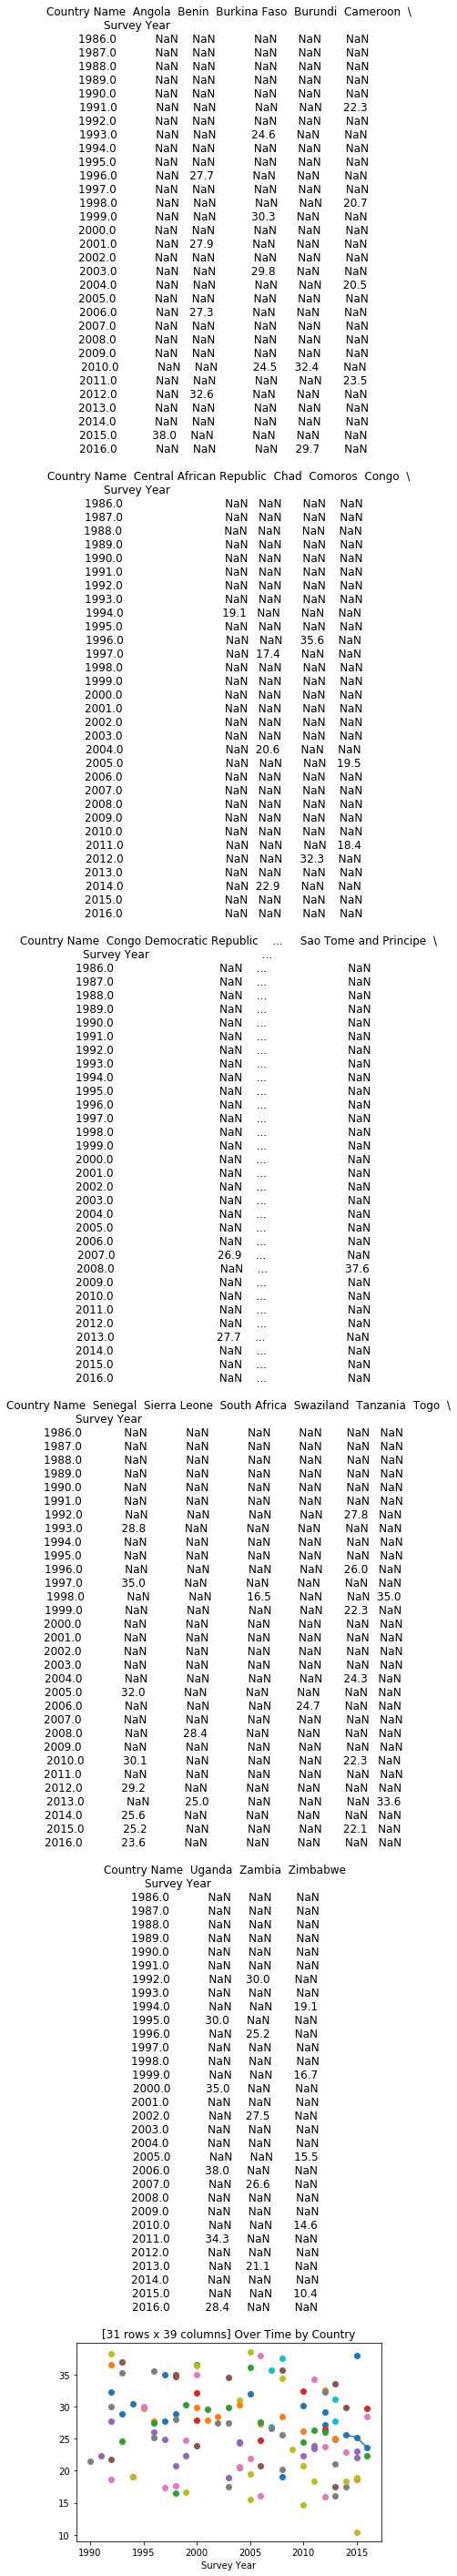

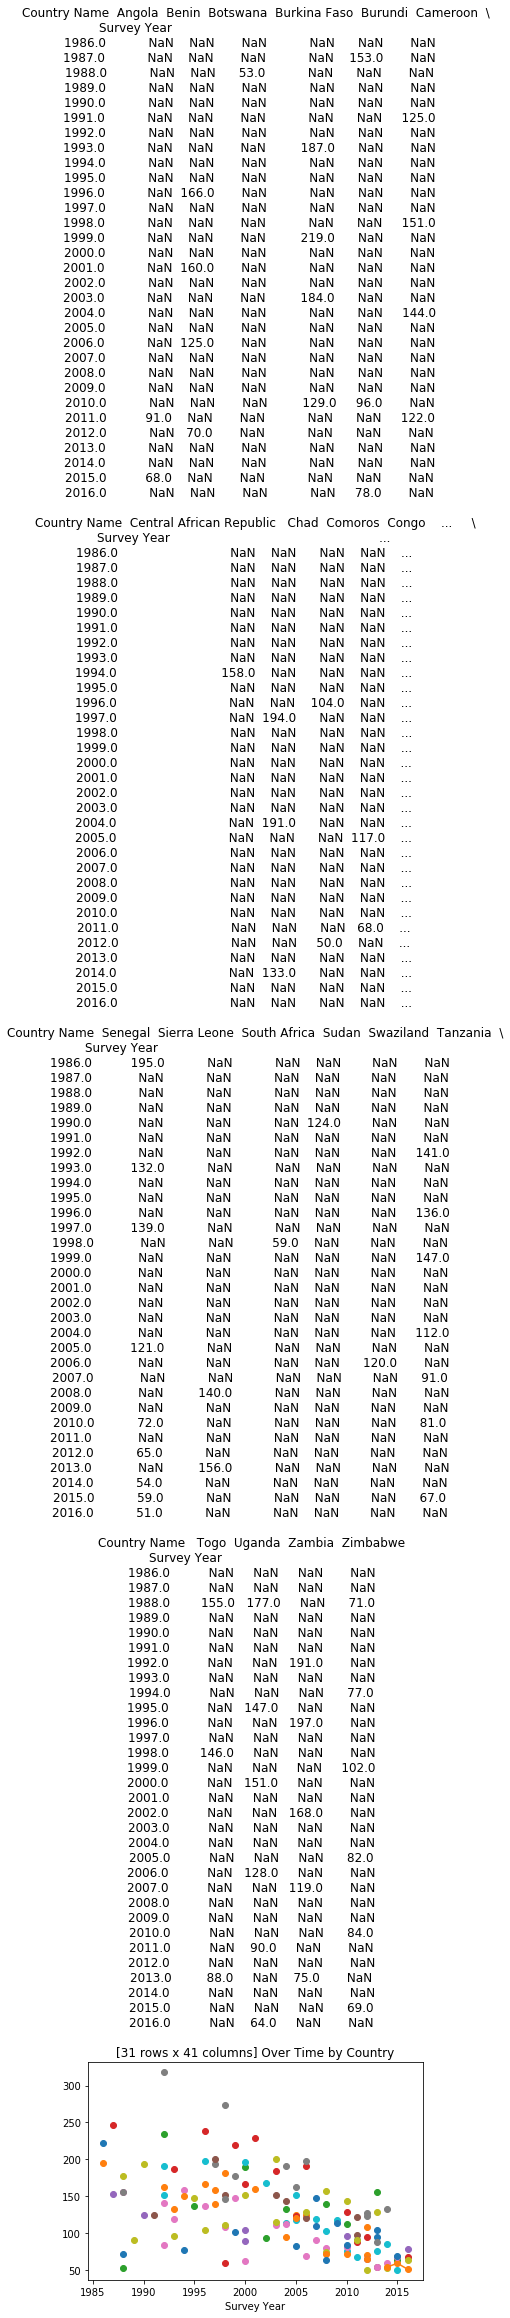

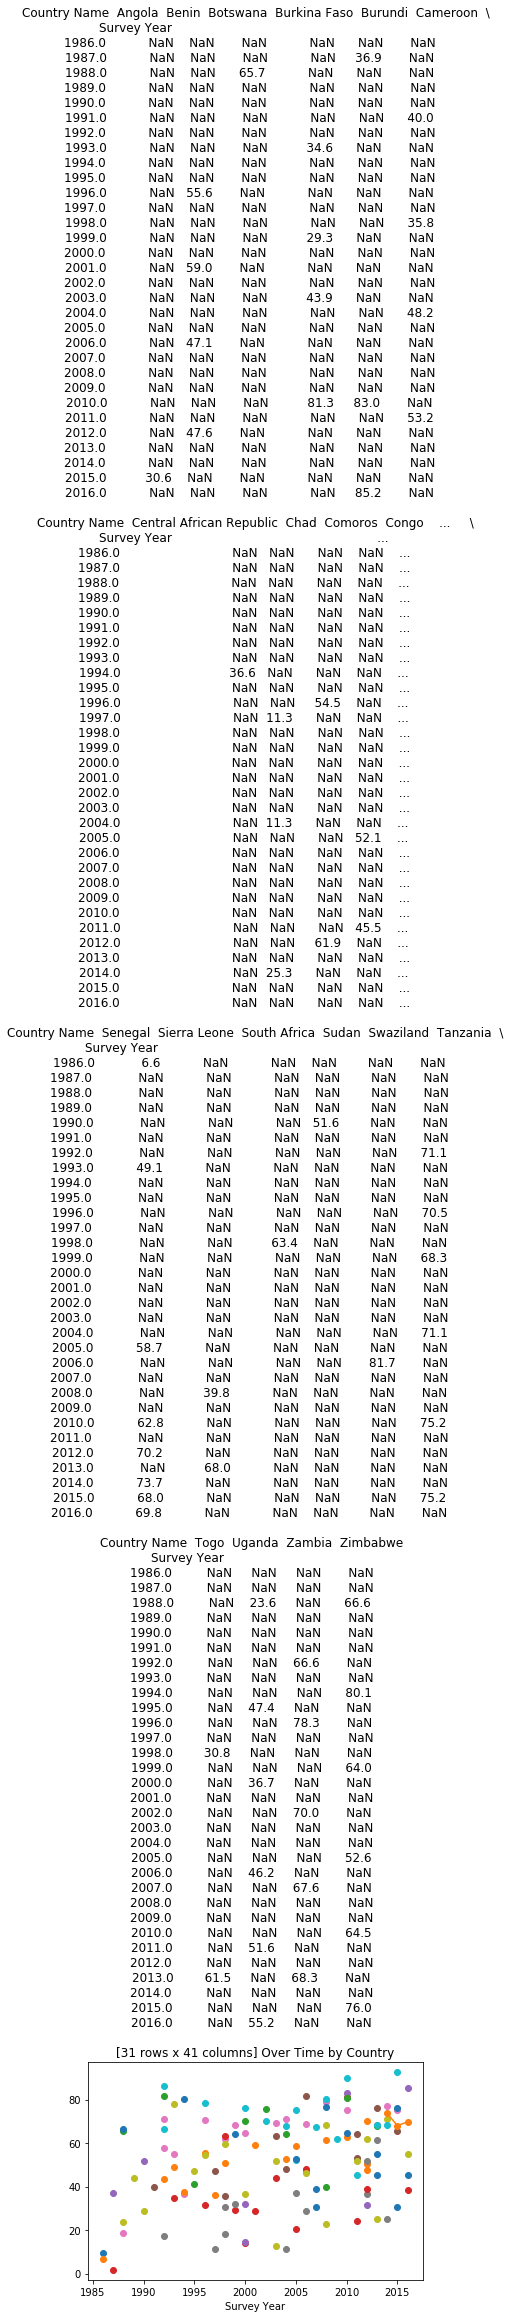

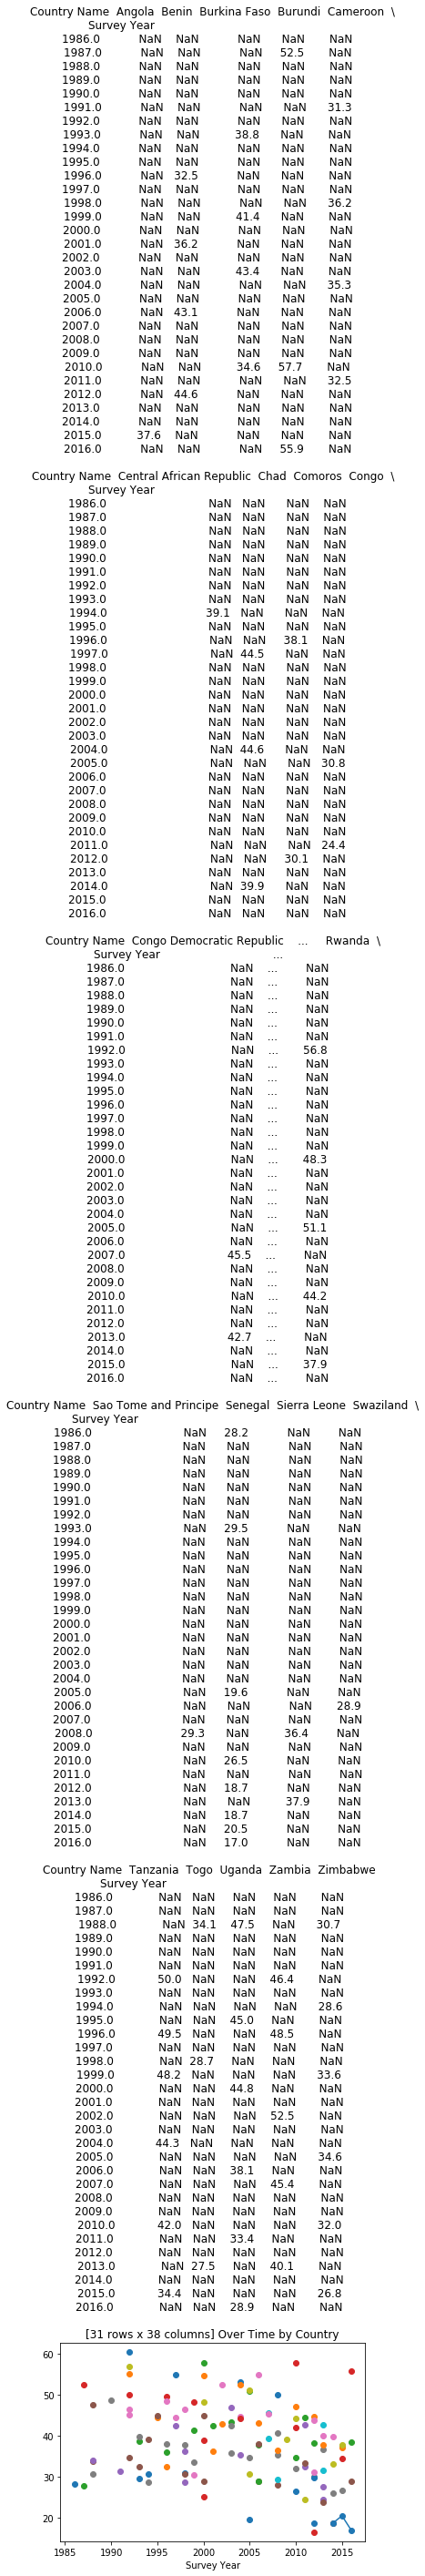

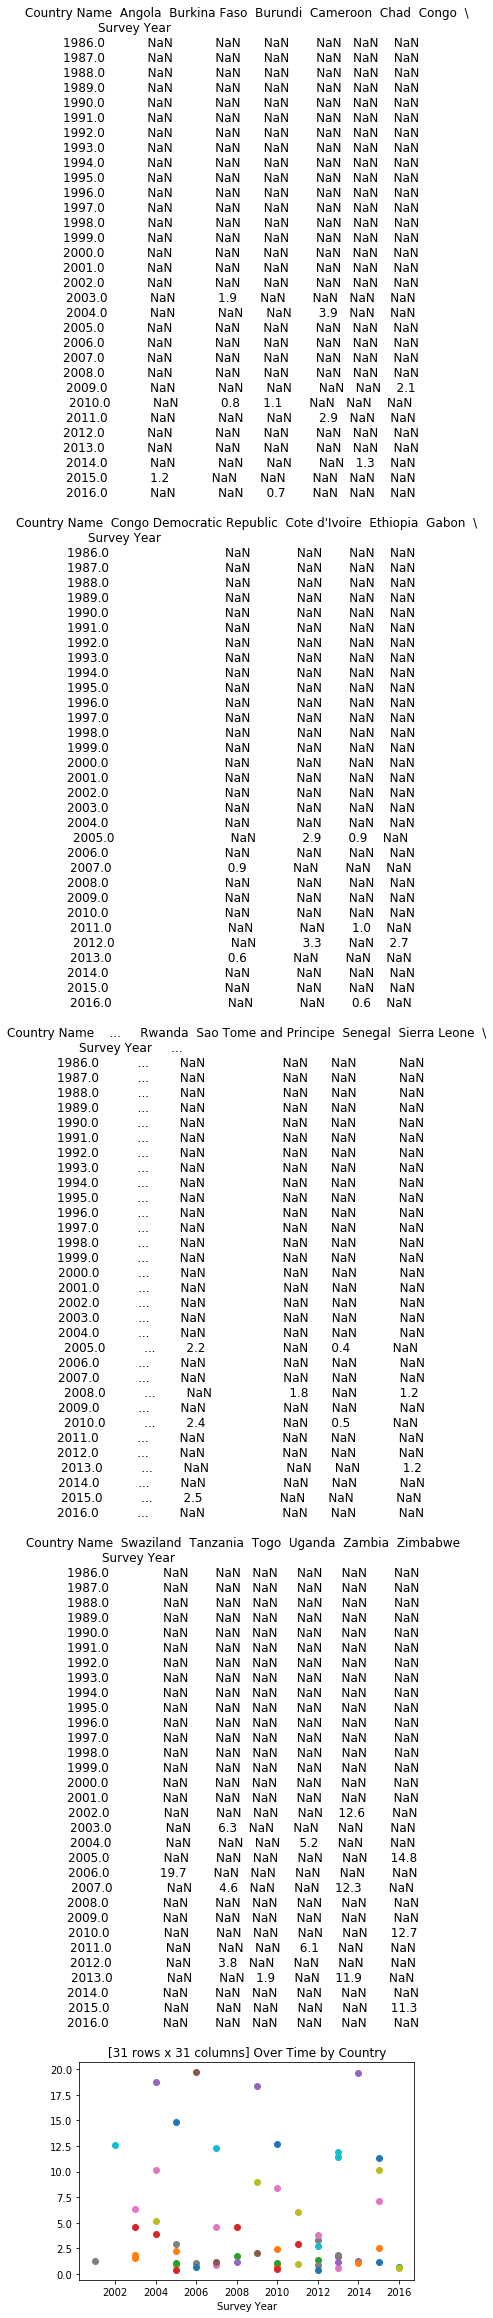

In [18]:
#Need help finding the error here. How to properly title these graphs
#Need help subplotting these graphs
#Need to connect the non-NaN values into line graphs
metrics=['Infant mortality rate','Unmet need for family planning','Under-five mortality rate','Received all 8 basic vaccinations','Children stunted','HIV prevalence among men']
for metric in metrics:
    print(metric)
    a=surveys.loc[surveys['Indicator']==metric]
    metric=pd.pivot_table(a,values='Value',index='Survey Year',columns='Country Name')
    metric.plot(legend=None, marker='o',title= str(metric)+' Over Time by Country')
plt.show()


In [19]:
#Creating Pivot Table for One Metric: Infant Mortality
infant_country_year=pd.pivot_table(surveys_infant,values='Value',index='Country Name',columns='Survey Year')
infant_country_year.head(10)

Survey Year,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Country Name,,,,,,,,,,,,,,,,,,,,,
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,44.0,NaN
Benin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN
Botswana,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,...,NaN,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
Burundi,NaN,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,47.0
Cameroon,NaN,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN
Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN,NaN
Comoros,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN


In [20]:
infant_yoy_change=[]
for index, row in infant_country_year.iterrows():
    print(index)
    initial_year=row.first_valid_index()
    print(initial_year)
    initial_value=row.loc[row.first_valid_index()]
    print(initial_value)
    final_year=row.last_valid_index()
    print(final_year)
    final_value=row.loc[row.last_valid_index()]
    print(final_value)
    periods=final_year-initial_year
    print(periods)
    delta=final_value/initial_value
    print(delta)
    exponent=1.0/periods
    print(exponent)
    percent_change=((delta**exponent)-1)*100
    print('Percent Change: ' + str(round(percent_change,2))+'%')
    infant_yoy_change.append(percent_change)
    #need to add to dataframe as new attribute

Angola
2011.0
50.0
2015.0
44.0
4.0
0.88
0.25
Percent Change: -3.15%
Benin
1996.0
94.0
2012.0
42.0
16.0
0.44680851063829785
0.0625
Percent Change: -4.91%
Botswana
1988.0
38.0
1988.0
38.0
0.0
1.0
inf
Percent Change: 0.0%
Burkina Faso
1993.0
94.0
2010.0
65.0
17.0
0.6914893617021277
0.058823529411764705
Percent Change: -2.15%
Burundi
1987.0
74.0
2016.0
47.0
29.0
0.6351351351351351
0.034482758620689655
Percent Change: -1.55%
Cameroon
1991.0
64.0
2011.0
62.0
20.0
0.96875
0.05
Percent Change: -0.16%
Central African Republic
1994.0
97.0
1994.0
97.0
0.0
1.0
inf
Percent Change: 0.0%
Chad
1997.0
103.0
2014.0
72.0
17.0
0.6990291262135923
0.058823529411764705
Percent Change: -2.08%
Comoros
1996.0
77.0
2012.0
36.0
16.0
0.4675324675324675
0.0625
Percent Change: -4.64%
Congo
2005.0
75.0
2011.0
39.0
6.0
0.52
0.16666666666666666
Percent Change: -10.33%
Congo Democratic Republic
2007.0
92.0
2013.0
58.0
6.0
0.6304347826086957
0.16666666666666666
Percent Change: -7.4%
Cote d'Ivoire
1994.0
89.0
2012.0
68.0


C:\Users\darre\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


In [21]:
#Creating pivot table of every metric in Country X Year Style
#Calculating the YoY change for each country in each metric
yoy_changes={}
pivot_tables={}
for metric in metrics:
    a=surveys.loc[surveys['Indicator']==metric]    
    pivot_tables[metric]=pd.pivot_table(a,values='Value',index='Country Name',columns='Survey Year')
    #Generate dataframe with name of the metric at hand, column names are Country, YoY Change
    print(metric)
    yoy_changes[metric]={}
    for index, row in pivot_tables[metric].iterrows():
        #if row.first_valid_index()==NaN
        if(row.isnull().all()):
            percent_change=np.nan
        else:
            initial_year=row.first_valid_index()
            initial_value=row.loc[row.first_valid_index()]
            final_year=row.last_valid_index()
            final_value=row.loc[row.last_valid_index()]
            periods=final_year-initial_year
            delta=final_value/initial_value
            exponent=1.0/periods
            percent_change=((delta**exponent)-1)*100
        print(index+' Percent Change: ' + str(round(percent_change,2))+'%')
        yoy_changes[metric][index]=percent_change

Infant mortality rate
Angola Percent Change: -3.15%
Benin Percent Change: -4.91%
Botswana Percent Change: 0.0%
Burkina Faso Percent Change: -2.15%
Burundi Percent Change: -1.55%
Cameroon Percent Change: -0.16%
Central African Republic Percent Change: 0.0%
Chad Percent Change: -2.08%
Comoros Percent Change: -4.64%
Congo Percent Change: -10.33%
Congo Democratic Republic Percent Change: -7.4%
Cote d'Ivoire Percent Change: -1.48%
Eritrea Percent Change: -4.45%
Ethiopia Percent Change: -4.3%
Gabon Percent Change: -2.32%
Gambia Percent Change: 0.0%
Ghana Percent Change: -2.39%
Guinea Percent Change: -2.88%
Kenya Percent Change: -1.77%
Lesotho Percent Change: -4.24%
Liberia Percent Change: -3.57%
Madagascar Percent Change: -4.05%
Malawi Percent Change: -4.95%
Mali Percent Change: -2.48%
Mauritania Percent Change: 0.0%
Mozambique Percent Change: -5.19%
Namibia Percent Change: -1.79%
Niger Percent Change: -4.31%
Nigeria Percent Change: -1.0%
Rwanda Percent Change: -4.16%
Sao Tome and Principe P

C:\Users\darre\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


HIV prevalence among men
Angola Percent Change: 0.0%
Benin Percent Change: nan%
Botswana Percent Change: nan%
Burkina Faso Percent Change: -11.62%
Burundi Percent Change: -7.26%
Cameroon Percent Change: -4.14%
Central African Republic Percent Change: nan%
Chad Percent Change: 0.0%
Comoros Percent Change: nan%
Congo Percent Change: 0.0%
Congo Democratic Republic Percent Change: -6.53%
Cote d'Ivoire Percent Change: 1.86%
Eritrea Percent Change: nan%
Ethiopia Percent Change: -3.62%
Gabon Percent Change: 0.0%
Gambia Percent Change: 0.0%
Ghana Percent Change: -3.35%
Guinea Percent Change: 3.51%
Kenya Percent Change: 0.0%
Lesotho Percent Change: 0.47%
Liberia Percent Change: 6.99%
Madagascar Percent Change: nan%
Malawi Percent Change: -3.24%
Mali Percent Change: -3.29%
Mauritania Percent Change: nan%
Mozambique Percent Change: 2.11%
Namibia Percent Change: 0.0%
Niger Percent Change: -8.91%
Nigeria Percent Change: nan%
Rwanda Percent Change: 1.29%
Sao Tome and Principe Percent Change: 0.0%
Se

In [22]:
yoy_changes['Infant mortality rate']

{'Angola': -3.145307188309876,
 'Benin': -4.910494306243828,
 'Botswana': 0.0,
 'Burkina Faso': -2.146668127131135,
 'Burundi': -1.553046624948684,
 'Cameroon': -0.15861756073679567,
 'Central African Republic': 0.0,
 'Chad': -2.084225596911349,
 'Comoros': -4.640660131253149,
 'Congo': -10.325859261556813,
 'Congo Democratic Republic': -7.400915199658109,
 "Cote d'Ivoire": -1.484037241220404,
 'Eritrea': -4.447408157528232,
 'Ethiopia': -4.301673342508128,
 'Gabon': -2.321390936310752,
 'Gambia': 0.0,
 'Ghana': -2.3948321247008075,
 'Guinea': -2.8828216422507436,
 'Kenya': -1.7733368577216302,
 'Lesotho': -4.240678124216446,
 'Liberia': -3.567510136095642,
 'Madagascar': -4.049466670608948,
 'Malawi': -4.949840761862035,
 'Mali': -2.4830860263588828,
 'Mauritania': 0.0,
 'Mozambique': -5.191744056326774,
 'Namibia': -1.7908634141819868,
 'Niger': -4.3063206425912215,
 'Nigeria': -1.0027714852601344,
 'Rwanda': -4.1585172454261965,
 'Sao Tome and Principe': 0.0,
 'Senegal': -2.93544653

In [23]:
yoy_changes.keys()

dict_keys(['Infant mortality rate', 'Unmet need for family planning', 'Under-five mortality rate', 'Received all 8 basic vaccinations', 'Children stunted', 'HIV prevalence among men'])

In [24]:
#Turn dictionary into DF with Country as left Index and Metric as top index.
fam_plan=pd.DataFrame(list(yoy_changes['Unmet need for family planning'].items()),columns=['Country','Unmet Need for Family Planning'])
fam_plan['rank']=fam_plan['Unmet Need for Family Planning'].rank(ascending=1)
fam_plan.sort_values(by='rank',ascending=True)
fam_plan

five_mortality=pd.DataFrame(list(yoy_changes['Under-five mortality rate'].items()),columns=['Country','Under-five mortality rate'])
five_mortality['rank']=five_mortality['Under-five mortality rate'].rank(ascending=1)
five_mortality.sort_values(by='rank',ascending=True)
five_mortality

vaccinations=pd.DataFrame(list(yoy_changes['Received all 8 basic vaccinations'].items()),columns=['Country','Received all 8 basic vaccinations'])
vaccinations['rank']=vaccinations['Received all 8 basic vaccinations'].rank(ascending=0)
vaccinations.sort_values(by='rank',ascending=True)
vaccinations

children_stunted=pd.DataFrame(list(yoy_changes['Children stunted'].items()),columns=['Country','Children stunted'])
children_stunted['rank']=children_stunted['Children stunted'].rank(ascending=1)
children_stunted.sort_values(by='rank',ascending=True)
children_stunted

male_HIV=pd.DataFrame(list(yoy_changes['HIV prevalence among men'].items()),columns=['Country','HIV prevalence among men'])
male_HIV['rank']=male_HIV['HIV prevalence among men'].rank(ascending=1)
male_HIV.sort_values(by='rank',ascending=True)

print(male_HIV.head())
print(vaccinations.head())
#Captures the difference in which directions metrics should be ranked. Ranked higher for reducing HIV prevalence and for increased vaccination access 

        Country  HIV prevalence among men  rank
0        Angola                  0.000000  18.0
1         Benin                       NaN   NaN
2      Botswana                       NaN   NaN
3  Burkina Faso                -11.624116   1.0
4       Burundi                 -7.256341   3.0
        Country  Received all 8 basic vaccinations  rank
0        Angola                           0.000000  33.0
1         Benin                          -0.966242  40.0
2      Botswana                           0.000000  33.0
3  Burkina Faso                           5.153657  11.0
4       Burundi                           2.927516  15.0


In [25]:
#CREATE Super Metric
countries=list(infant_country_year.index)
#countries=['Angola']
rank_sets=[fam_plan,five_mortality,vaccinations,children_stunted,male_HIV]
master_rank={}
for country in countries:
    values = []
    for rank in rank_sets: 
        values.append(rank.loc[rank['Country'] == country, 'rank'].item())
    values=pd.Series(values)
    combined_rank = values.sum()/float(len(values))
    master_rank[country]=combined_rank
master_rank


{'Angola': 22.7,
 'Benin': 24.6,
 'Botswana': 13.9,
 'Burkina Faso': 17.4,
 'Burundi': 17.4,
 'Cameroon': 25.4,
 'Central African Republic': 26.0,
 'Chad': 23.0,
 'Comoros': 13.8,
 'Congo': 15.4,
 'Congo Democratic Republic': 13.2,
 "Cote d'Ivoire": 23.4,
 'Eritrea': 10.6,
 'Ethiopia': 5.4,
 'Gabon': 14.2,
 'Gambia': 29.6,
 'Ghana': 10.6,
 'Guinea': 25.8,
 'Kenya': 14.0,
 'Lesotho': 15.4,
 'Liberia': 14.2,
 'Madagascar': 8.8,
 'Malawi': 14.0,
 'Mali': 17.2,
 'Mauritania': 26.0,
 'Mozambique': 21.6,
 'Namibia': 17.8,
 'Niger': 12.8,
 'Nigeria': 19.2,
 'Rwanda': 15.0,
 'Sao Tome and Principe': 29.6,
 'Senegal': 15.2,
 'Sierra Leone': 21.0,
 'South Africa': 20.3,
 'Sudan': 13.9,
 'Swaziland': 29.6,
 'Tanzania': 15.4,
 'Togo': 19.8,
 'Uganda': 19.0,
 'Zambia': 16.4,
 'Zimbabwe': 19.2}

In [26]:
#master_rank.items()
master_rank_df=pd.DataFrame(list(master_rank.items()),columns=['Country Name','Master Rank'])
master_rank_df.sort_values(by='Master Rank')

,Country Name,Master Rank
13,Ethiopia,5.4
21,Madagascar,8.8
12,Eritrea,10.6
16,Ghana,10.6
27,Niger,12.8
10,Congo Democratic Republic,13.2
8,Comoros,13.8
2,Botswana,13.9
34,Sudan,13.9
22,Malawi,14.0


In [ ]:
#Calculating change over time for each region for infant mortality
#NEED TO MAKE CALCULATION HERE. Average together for same year? 
region_country_year=pd.pivot_table(surveys_infant,values='Value',index=['Region','Country Name'],columns='Survey Year')
region_country_year.head(10)

In [ ]:
#YoY change for all metrics by region

In [ ]:
#Weighted winner and loser region for all metric (average each region's rank)
#show that this makes sense with GDP or whatever

In [ ]:
#Put the improvements on a map

In [27]:
#Pulling data from the New York Times Article Search API
#Initial request is simply query for articles on Public Health in Africa
r = requests.get('http://api.nytimes.com/svc/search/v2/articlesearch.json?[q=public+health&fq=glocations:("AFRICA")&api-key=f87aeae59f034ff1a19feec0d41e5a11')
articles=r.json()
articles

{'copyright': 'Copyright (c) 2018 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'_id': '4fc3ad1045c1498b0d7dd428',
    'abstract': 'Pedro VII, King of the Congo',
    'blog': {},
    'document_type': 'article',
    'headline': {'content_kicker': None,
     'kicker': None,
     'main': 'King of the Congo Dies at 80',
     'name': None,
     'print_headline': None,
     'seo': None,
     'sub': None},
    'keywords': [{'major': None,
      'name': 'persons',
      'rank': 0,
      'value': 'PEDRO FIRMINO JOHN'},
     {'major': None,
      'name': 'persons',
      'rank': 0,
      'value': 'PEDRO VII, KING OF THE CONGO'},
     {'major': None, 'name': 'glocations', 'rank': 0, 'value': 'AFRICA'},
     {'major': None,
      'name': 'subject',
      'rank': 0,
      'value': 'PORTUGUESE DEPENDENCIES'},
     {'major': None, 'name': 'subject', 'rank': 0, 'value': 'DEATHS'}],
    'multimedia': [],
    'print_page': '23',
    'pub_date': '1955-04-18T00:00:00Z',
    's

In [28]:
#Using facets, facet filters, date range, field limit, highlighting search term
r1 = requests.get('http://api.nytimes.com/svc/search/v2/articlesearch.json?fq=HIV AND glocations:("AFRICA")&facet_field=source&begin_date=19700101&end_date=20150101&facet_filter=True&facet_field=section_name&fl=pub_date,snippet&sort=oldest&api-key=f87aeae59f034ff1a19feec0d41e5a11')
j=r1.json()
j

{'copyright': 'Copyright (c) 2018 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'pub_date': '1987-04-09T00:00:00Z',
    'score': 1.0,
    'snippet': 'LEAD: A virus believed to be related to the one that causes AIDS and reported to be present in some humans in West Africa is virtually identical with another virus that causes an AIDS-like disease in monkeys, according to a new report.'},
   {'pub_date': '1987-05-07T00:00:00Z',
    'score': 1.0,
    'snippet': 'LEAD: New data have confirmed that a human virus found in West Africa that is related to the original AIDS virus can also cause the fatal disease. This second AIDS virus could contribute to the wider spread of the AIDS epidemic, French researchers...'},
   {'pub_date': '1987-06-05T00:00:00Z',
    'score': 1.0,
    'snippet': 'LEAD: A second AIDS virus, previously reported spreading in West Africa, has been detected in Europe and Brazil, Dr. Luc Montagnier of the Pasteur Institute in Paris said here toda

In [29]:
#Turning JSON output into csv
def parse_articles(articles,query): #need to check that query in here doesn't break anything
    '''
    This function takes in a response to the NYT api and parses
    the articles into a list of dictionaries
    '''
    news = []
    for i in articles['response']['docs']: 
        dic = {}
        dic['id'] = i.get('_id')
        if i.get('abstract') is not None:
            dic['abstract'] = i.get('abstract').encode("utf8")
        dic['headline'] = i['headline']['main'].encode("utf8") 
        dic['desk'] = i.get('new_desk')
        dic['date'] = i.get('pub_date')[0:10] # cutting time of day.
        #dic['section'] = i['section_name']
        if i.get('snippet') is not None:
            dic['snippet'] = i.get('snippet').encode("utf8")
        dic['source'] = i.get('source')
        dic['type'] = i.get('type_of_material')
        dic['url'] = i.get('web_url')
        dic['word_count'] = i.get('word_count')
        dic['query']=query #need to check that this doesn't break anything
        # locations
        locations = []
        for x in range(0,len(i['keywords'])):
            if 'glocations' in i['keywords'][x]['name']:
                locations.append(i['keywords'][x]['value'])
        dic['locations'] = [item.lower() for item in locations]
        # subject
        subjects = []
        for x in range(0,len(i['keywords'])):
            if 'subject' in i['keywords'][x]['name']:
                subjects.append(i['keywords'][x]['value'])
        dic['subjects'] = subjects   
        news.append(dic)
    return(news) 

In [30]:
parsed_articles=parse_articles(articles)

TypeError: parse_articles() missing 1 required positional argument: 'query'

In [32]:
parsed_df=pd.DataFrame(parsed_articles)
parsed_df.head()

NameError: name 'parsed_articles' is not defined

In [33]:
def get_articles(query):
    '''
    This function accepts a query (e.g.'HIV') and it will 
    return a list of parsed articles (in dictionaries)
    for that year.
    '''
    all_articles = []
    for i in range(0,1): #NYT limits pager to first 100 pages. But rarely will you find over 50 pages of results anyway.
        print(i)
        url=('http://api.nytimes.com/svc/search/v2/articlesearch.json?fq='+str(query)+' AND glocations:("AFRICA")&begin_date=19700101&end_date=20151231&page='+str(i)+'&api-key=f87aeae59f034ff1a19feec0d41e5a11')
        r1 = requests.get(url)
        articles =r1.json()
        articles = parse_articles(articles,query) #need to check that this works
        all_articles = all_articles + articles
        time.sleep(10)
    return(all_articles)

In [71]:
url=('http://api.nytimes.com/svc/search/v2/articlesearch.json?fq='+str(query)+' AND glocations:("AFRICA")&begin_date=19700101&end_date=20151231&page='+str(1)+'&api-key=f87aeae59f034ff1a19feec0d41e5a11')
r1 = requests.get(url)
articles =r1.json()
query='HIV'
articles = parse_articles(articles,query)
articles

[{'abstract': b'Many makers of fragrance and bath products are following industrywide trend of shifting away from chemical formulas, substituting naturals oil and extracts from fair trade vendors across Africa.',
  'date': '2014-03-13',
  'desk': None,
  'headline': b'African Oils, Exotic and in Demand',
  'id': '5320e9dd38f0d80f6b2c83d4',
  'locations': ['africa'],
  'query': 'HIV',
  'snippet': b'Moving away from chemical formulas, many companies are adding naturals oil and extracts from Africa.',
  'source': 'The New York Times',
  'subjects': ['Cosmetics and Toiletries'],
  'type': 'News',
  'url': 'https://www.nytimes.com/2014/03/13/fashion/african-oils-exotic-and-in-demand.html',
  'word_count': 706},
 {'abstract': b'Nearly all rhino poaching in Africa since 2006 occurred in Zimbabwe and South Africa, according to a new report compiled by environmental groups.',
  'date': '2009-12-04',
  'desk': None,
  'headline': b'Report: Rhino Poaching on the Rise',
  'id': '4fd398a08eb7c8105

In [72]:
#NEED TO APPEND THE QUERY TERM TO THE ARTICLE
query_all = []
queries =['HIV','Infant Mortality','Global Health','Public Health','Vaccination','Family Planning', 'ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)','Third World and Developing Countries']
for query in queries:
    print ('Processing ' + str(query) + '...')
    query_one = get_articles(query)
    #query_store = [query_one,query]
    query_all = query_all + query_one

Processing HIV...
0
Processing Infant Mortality...
0
Processing Global Health...
0
Processing Public Health...
0
Processing Vaccination...
0
Processing Family Planning...
0
Processing ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS)...
0
Processing Third World and Developing Countries...
0


In [73]:
queries_df=pd.DataFrame(query_all)
queries_df.head(80)
#Captured 977 articles from these 100 pages, where there are 10 articles per page. So we probably missed some articles by limiting to 25

,abstract,date,desk,headline,id,locations,query,snippet,source,subjects,type,url,word_count
0,NaN,1989-06-27,None,b'4 Cases Found Of Rare Strain Of AIDS Virus',4fd1a4018eb7c8105d6bbeb2,"[new york city, africa]",HIV,b'LEAD: Researchers have discovered several bl...,The New York Times,"[ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS), R...",News,https://www.nytimes.com/1989/06/27/nyregion/4-...,1386
1,NaN,1991-03-03,None,b'INDIAN AIDS REPORT CITES SECOND VIRUS',4fd1a7a78eb7c8105d6c29cb,"[india, africa, united states]",HIV,b'An Indian specialist in sexually transmitted...,The New York Times,"[ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS), V...",News,https://www.nytimes.com/1991/03/03/world/india...,862
2,NaN,1990-04-29,None,b'AIDS Linked to TB Outbreak in Africa',4fd1b8a68eb7c8105d6e0be6,[africa],HIV,b'LEAD: To the dismay of public-health officia...,The New York Times,"[ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS), T...",News,https://www.nytimes.com/1990/04/29/world/aids-...,875
3,NaN,2008-05-08,None,b'Four Players Who Came Out of Africa Return t...,54813ffd38f0d874625c81da,"[nigeria, africa]",HIV,b'Four African football players made a charity...,The New York Times,"[Football, Philanthropy]",News,https://www.nytimes.com/2008/05/08/sports/foot...,967
4,NaN,1987-04-09,None,b'2 VIRTUALLY IDENTICAL VIRUSES PRESENT NEW AI...,4fd17c3e8eb7c8105d6753a1,[africa],HIV,b'LEAD: A virus believed to be related to the ...,The New York Times,"[MONKEYS AND APES, ACQUIRED IMMUNE DEFICIENCY ...",News,https://www.nytimes.com/1987/04/09/us/2-virtua...,818
5,NaN,1988-08-09,None,"b""Nigeria Insists It'll Keep AIDS the Rare Exc...",4fd17f878eb7c8105d67ab58,"[africa, nigeria]",HIV,"b'LEAD: One Nigerian AIDS patient, a hemophili...",The New York Times,"[DRUG ADDICTION AND ABUSE, ACQUIRED IMMUNE DEF...",News,https://www.nytimes.com/1988/08/09/world/niger...,1022
6,"b'In this lesson, students consider the social...",2005-04-12,None,b'Deadly Diseases',4fd363e28eb7c8105d8b283a,[africa],HIV,"b'In this lesson, students consider the social...",The New York Times,[],Blog,https://learning.blogs.nytimes.com/2005/04/12/...,2444
7,"b""One hundred million people watched a video i...",2012-05-21,None,"b'To Help Africa, First Understand It'",4fd3a4508eb7c8105d8eed80,"[africa, uganda]",HIV,"b""One hundred million people watched a video i...",The New York Times,[Child Soldiers],Blog,https://rendezvous.blogs.nytimes.com/2012/05/2...,600
8,"b""United Nations' International Labor Organiza...",2000-06-13,None,b'U.N. Agency Sees AIDS Depleting the African ...,4fd208278eb7c8105d772c29,[africa],HIV,b'AIDS will have a particularly insidious effe...,The New York Times,"[CHILD LABOR, LABOR, ACQUIRED IMMUNE DEFICIENC...",News,https://www.nytimes.com/2000/06/13/business/in...,392
9,"b""Various theories, some of them scientific an...",1998-12-27,None,b'The World; AIDS in Africa: The Silent Stalker',4fd21e188eb7c8105d79fef9,[africa],HIV,b'THE earliest confirmed case of infection wit...,The New York Times,[ACQUIRED IMMUNE DEFICIENCY SYNDROME],News,https://www.nytimes.com/1998/12/27/weekinrevie...,1214


In [74]:
countries_list=list(regions.keys())
for country in countries_list:
    queries_df[str(country).lower()]=0
queries_df.head()

,abstract,date,desk,headline,id,locations,query,snippet,source,subjects,...,congo,congo democratic republic,equatorial guinea,gabon,sao tome and principe,botswana,lesotho,namibia,south africa,swaziland
0,NaN,1989-06-27,None,b'4 Cases Found Of Rare Strain Of AIDS Virus',4fd1a4018eb7c8105d6bbeb2,"[new york city, africa]",HIV,b'LEAD: Researchers have discovered several bl...,The New York Times,"[ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS), R...",...,0,0,0,0,0,0,0,0,0,0
1,NaN,1991-03-03,None,b'INDIAN AIDS REPORT CITES SECOND VIRUS',4fd1a7a78eb7c8105d6c29cb,"[india, africa, united states]",HIV,b'An Indian specialist in sexually transmitted...,The New York Times,"[ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS), V...",...,0,0,0,0,0,0,0,0,0,0
2,NaN,1990-04-29,None,b'AIDS Linked to TB Outbreak in Africa',4fd1b8a68eb7c8105d6e0be6,[africa],HIV,b'LEAD: To the dismay of public-health officia...,The New York Times,"[ACQUIRED IMMUNE DEFICIENCY SYNDROME (AIDS), T...",...,0,0,0,0,0,0,0,0,0,0
3,NaN,2008-05-08,None,b'Four Players Who Came Out of Africa Return t...,54813ffd38f0d874625c81da,"[nigeria, africa]",HIV,b'Four African football players made a charity...,The New York Times,"[Football, Philanthropy]",...,0,0,0,0,0,0,0,0,0,0
4,NaN,1987-04-09,None,b'2 VIRTUALLY IDENTICAL VIRUSES PRESENT NEW AI...,4fd17c3e8eb7c8105d6753a1,[africa],HIV,b'LEAD: A virus believed to be related to the ...,The New York Times,"[MONKEYS AND APES, ACQUIRED IMMUNE DEFICIENCY ...",...,0,0,0,0,0,0,0,0,0,0


In [80]:
locations=queries_df.locations
type(locations)
pd.get_dummies(locations.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)
#queries_df.locations.apply(lambda row: pd.Series([1] * len(row), index=row)).fillna(0, downcast='infer')

,afghanistan,africa,botswana,"far east, south and southeast asia and pacific areas",gabon,india,israel,kenya,latin america and caribbean area,malawi,...,union of soviet socialist republics,baltic soviet socialist republics,burkina faso,colombia,haiti,taiwan,mumbai (india),laos,"guinea, republic of",venezuela
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
#Running data quality report
df=queries_df.copy()
columns = list(df.columns.values)
data_types = pd.DataFrame(df.dtypes,columns=['dtype'])
missing_data_counts = pd.DataFrame(df.isnull().sum(),columns=['missing'])
present_data_counts = pd.DataFrame(df.count(),columns=['count'])
unique_value_counts = pd.DataFrame(columns=['unique'])
#for v in list(df.columns.values):
#    unique_value_counts.loc[v] = [df[v].nunique()]
#minimum_values = pd.DataFrame(columns=['min'])
#for v in list(df.columns.values):
#    minimum_values.loc[v] = [df[v].min()]
#maximum_values = pd.DataFrame(columns=['max'])
#for v in list(df.columns.values):
#    maximum_values.loc[v] = [df[v].max()]
data_quality_report = (data_types.join(present_data_counts).join(missing_data_counts).
                       join(unique_value_counts))#.join(minimum_values).
                       #join(maximum_values)

print("\nData Quality Report")
print("Total records: {}".format(len(df.index)))
data_quality_report.sort_values(['missing'], ascending=False)


Data Quality Report
Total records: 977


,dtype,count,missing,unique
abstract,object,545,432,NaN
desk,object,796,181,NaN
source,object,973,4,NaN
type,object,973,4,NaN
date,object,977,0,NaN
headline,object,977,0,NaN
id,object,977,0,NaN
locations,object,977,0,NaN
snippet,object,977,0,NaN
subjects,object,977,0,NaN


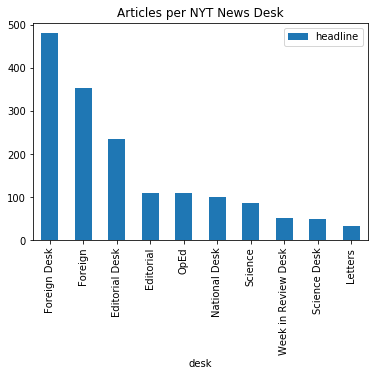

In [90]:
articles_per_desk=pd.pivot_table(queries_df,values='headline',index=['desk'],aggfunc='count').sort_values('headline',ascending=False)
articles_per_desk.head(10).plot(kind='bar',title='Articles per NYT News Desk')
#There was a long-tail so only looked at top 10
#Interestingly they changed from Foreign to Foreign Desk, will need to combine those if filtering

In [55]:
#need to break out lists so we can use pivot tables on them
articles_per_desk=pd.pivot_table(queries_df,values='headline',index=['locations'],aggfunc='count').sort_values('headline',ascending=False)
articles_per_desk.head(10).plot(kind='bar',title='Articles per Location')

TypeError: unhashable type: 'list'

In [ ]:
import csv
keys = Amnesty_all[0].keys()
with open('amnesty-mentions.csv', 'wb') as output_file:
    dict_writer = csv.DictWriter(output_file, keys)
    dict_writer.writeheader()
    dict_writer.writerows(Amnesty_all)

In [ ]:
#https://machinelearningmastery.com/handle-missing-data-python/